In [93]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [94]:
# Configure Selenium WebDriver for Microsoft Edge
options = webdriver.EdgeOptions()
# options.add_argument("--headless")  # Run in headless mode (no browser UI)
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

In [95]:
# Initialize the WebDriver
driver = webdriver.Edge(options=options)

In [96]:
# Function to scrape Black Friday products
def scrape_black_friday_products():
    base_url = "https://www.jumia.com.gh/mlp-black-friday/?shipped_from=country_local&page={}"
    all_products = []

    try:
        page = 1  # Start with the first page

        while True:
            # Navigate to the current page
            url = base_url.format(page)
            driver.get(url)

            # Wait for product elements to load
            try:
                WebDriverWait(driver, 10).until(
                    EC.presence_of_all_elements_located((By.CLASS_NAME, "prd"))
                )
            except Exception:
                print(f"No products found on page {page}. Stopping.")
                break  # Stop when no more products are found

            print(f"Scraping page {page}...")

            # Collect product data
            product_elements = driver.find_elements(By.CLASS_NAME, "prd")
            for product in product_elements:
                try:
                    name = product.find_element(By.CLASS_NAME, "name").text
                except Exception:
                    name = ""
                try:
                    current_price = product.find_element(By.CLASS_NAME, "prc").text
                    # Remove currency symbol and convert to float for sorting
                    current_price = float(current_price.replace("GH₵", "").replace(",", ""))
                except Exception:
                    current_price = None
                try:
                    initial_price = product.find_element(By.CLASS_NAME, "old").text
                    initial_price = float(initial_price.replace("GH₵", "").replace(",", ""))
                except Exception:
                    initial_price = None
                try:
                    discount = product.find_element(By.CLASS_NAME, "bdg._dsct._sm").text
                except Exception:
                    discount = ""
                try:
                    reviews = product.find_element(By.CLASS_NAME, "rev").text
                except Exception:
                    reviews = ""
                try:
                    stars = product.find_element(By.CLASS_NAME, "stars._s").text
                except Exception:
                    stars = ""
                try:
                    url = product.find_element(By.TAG_NAME, "a").get_attribute("href")
                except Exception:
                    url = ""

                # Create a dictionary for each product
                product_dict = {
                    "Name": name,
                    "Current_price": current_price,
                    "Initial_price": initial_price,
                    "Discount": discount,
                    "Reviews": reviews,
                    "Stars": stars,
                    "URL": url,
                }
                all_products.append(product_dict)

            # Move to the next page
            page += 1
            time.sleep(3)  # Add a short delay to avoid overwhelming the server

        # Convert collected data into a DataFrame
        product_df = pd.DataFrame(all_products)

        # Sort by current price from lowest to highest
        product_df = product_df.sort_values(by="Current_price", ascending=True)

        # Display the sorted data
        print(f"Scraped {len(all_products)} products.")
        display(product_df)

        # Save the sorted data to a CSV file
        product_df.to_csv("black_friday_sorted_products.csv", index=False)
        print("Data saved to 'black_friday_sorted_products.csv'.")

        # Generate visualizations
        visualize_data(product_df)

    finally:
        # Close the WebDriver session
        driver.quit()

In [97]:
def search_products(search_query):
    base_url = f"https://www.jumia.com.gh/catalog/?q={search_query.replace(' ', '+')}"
    all_products = []

    try:
        page = 1  # Start with the first page

        while True:
            # Construct the paginated URL
            search_url = f"{base_url}&page={page}"

            # Navigate to the search URL
            driver.get(search_url)

            # Wait for product elements to load
            try:
                WebDriverWait(driver, 10).until(
                    EC.presence_of_all_elements_located((By.CLASS_NAME, "prd"))
                )
            except Exception:
                print(f"No more products found on page {page}. Stopping.")
                break  # Stop when no more products are found

            print(f"Scraping results for '{search_query}' on page {page}...")

            # Collect product data
            product_elements = driver.find_elements(By.CLASS_NAME, "prd")
            for product in product_elements:
                try:
                    name = product.find_element(By.CLASS_NAME, "name").text
                except Exception:
                    name = ""
                try:
                    current_price = product.find_element(By.CLASS_NAME, "prc").text
                    current_price = float(current_price.replace("GH₵", "").replace(",", ""))
                except Exception:
                    current_price = None
                try:
                    initial_price = product.find_element(By.CLASS_NAME, "old").text
                    initial_price = float(initial_price.replace("GH₵", "").replace(",", ""))
                except Exception:
                    initial_price = None
                try:
                    discount = product.find_element(By.CLASS_NAME, "bdg._dsct._sm").text
                except Exception:
                    discount = ""
                try:
                    reviews = product.find_element(By.CLASS_NAME, "rev").text
                except Exception:
                    reviews = ""
                try:
                    stars = product.find_element(By.CLASS_NAME, "stars._s").text
                except Exception:
                    stars = ""
                try:
                    url = product.find_element(By.TAG_NAME, "a").get_attribute("href")
                except Exception:
                    url = ""

                # Create a dictionary for each product
                product_dict = {
                    "Name": name,
                    "Current_price": current_price,
                    "Initial_price": initial_price,
                    "Discount": discount,
                    "Reviews": reviews,
                    "Stars": stars,
                    "URL": url,
                }
                all_products.append(product_dict)

            # Check if there's a next page by looking for pagination elements
            try:
                next_page = driver.find_element(By.XPATH, "//a[@aria-label='Next Page']")
                if not next_page:
                    print("No more pages.")
                    break
            except Exception:
                print("No more pages.")
                break

            # Move to the next page
            page += 1
            time.sleep(3)  # Add a short delay to avoid overwhelming the server

        # Convert collected data into a DataFrame
        product_df = pd.DataFrame(all_products)

        # Sort by current price from lowest to highest
        product_df = product_df.sort_values(by="Current_price", ascending=True)

        # Display the sorted data
        print(f"Found {len(all_products)} products for '{search_query}'.")
        display(product_df)

        # Save the sorted data to a CSV file
        product_df.to_csv(f"{search_query.replace(' ', '_')}_sorted_products.csv", index=False)
        print(f"Data saved to '{search_query.replace(' ', '_')}_sorted_products.csv'.")

        # Generate visualizations
        visualize_data(product_df)

    except Exception as e:
        print(f"An error occurred: {e}")


In [98]:
# Function to generate visualizations
def visualize_data(product_df):
    # Ensure numeric columns are float
    product_df["Current_price"] = pd.to_numeric(product_df["Current_price"], errors="coerce")
    product_df["Initial_price"] = pd.to_numeric(product_df["Initial_price"], errors="coerce")

    # Top 10 cheapest products
    top_10 = product_df.nsmallest(10, "Current_price")

    # Bar chart: Top 10 Cheapest Products
    plt.figure(figsize=(10, 6))
    plt.barh(top_10["Name"], top_10["Current_price"], color="skyblue")
    plt.xlabel("Price (GH₵)")
    plt.ylabel("Product")
    plt.title("Top 10 Cheapest Products")
    plt.gca().invert_yaxis()
    plt.show()

    # Price Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(product_df["Current_price"].dropna(), bins=20, color="lightgreen", edgecolor="black")
    plt.xlabel("Price (GH₵)")
    plt.ylabel("Frequency")
    plt.title("Price Distribution")
    plt.show()


Scraping results for 'washing machine' on page 1...
Scraping results for 'washing machine' on page 2...
Scraping results for 'washing machine' on page 3...
Scraping results for 'washing machine' on page 4...
Scraping results for 'washing machine' on page 5...
Scraping results for 'washing machine' on page 6...
Scraping results for 'washing machine' on page 7...
Scraping results for 'washing machine' on page 8...
Scraping results for 'washing machine' on page 9...
Scraping results for 'washing machine' on page 10...
Scraping results for 'washing machine' on page 11...
Scraping results for 'washing machine' on page 12...
Scraping results for 'washing machine' on page 13...
Scraping results for 'washing machine' on page 14...
Scraping results for 'washing machine' on page 15...
Scraping results for 'washing machine' on page 16...
Scraping results for 'washing machine' on page 17...
Scraping results for 'washing machine' on page 18...
Scraping results for 'washing machine' on page 19...
Sc

,Name,Current_price,Initial_price,Discount,Reviews,Stars,URL
1908,Windshield Wiper Washer Fluid Reservoir Tank C...,11.66,23.33,50%,,,https://www.jumia.com.gh/customer/account/logi...
1265,New Windshield Windscreen Washer Nozzle 1Z0955...,11.84,22.54,47%,,,None
354,Windshield Washer Fluid Reservoir Cap for Hond...,12.31,24.62,50%,,,https://www.jumia.com.gh/customer/account/logi...
1920,915 Generation Rear Windshield Washer Nozzle 3...,15.14,30.28,50%,,,https://www.jumia.com.gh/customer/account/logi...
1864,2PCS Windshield Windscreen Washer Nozzle Jet 3...,17.77,33.72,47%,,,None
...,...,...,...,...,...,...,...
1705,Graffiti Measuring Pencils Set with Durable Al...,NaN,NaN,40%,,,None
1709,Garden Hose Holder Metal Garden Hose Stand Hea...,NaN,NaN,33%,,,None
1793,1800W 40A DC 12-48V Induction Heating Board ZV...,NaN,NaN,40%,,,None
1796,Garden Hose Holder Metal Garden Hose Stand Hea...,NaN,NaN,33%,,,None


Data saved to 'washing_machine_sorted_products.csv'.


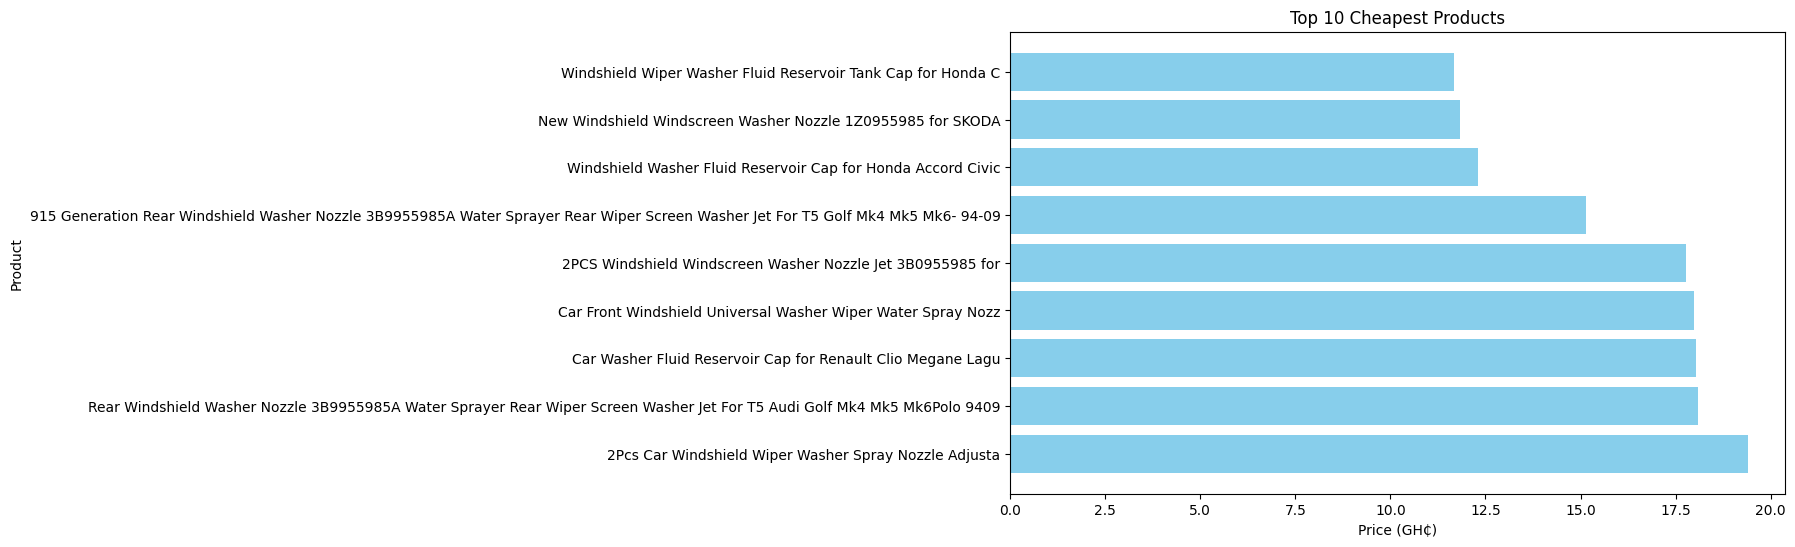

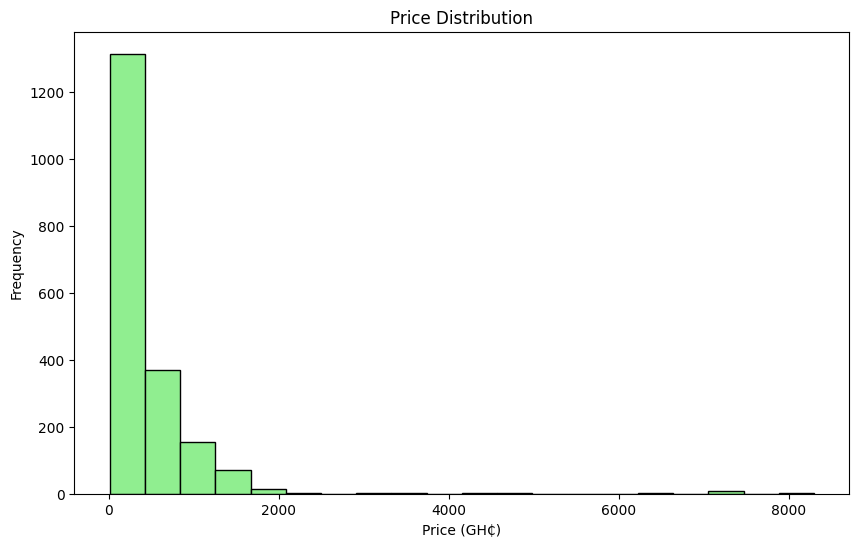

In [99]:
# Uncomment the function you want to run
# scrape_black_friday_products()
search_products("washing machine")